In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [41]:
from google.colab import files
files.upload()

Saving heart.csv to heart (1).csv


{'heart (1).csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,

In [42]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##**EDA**

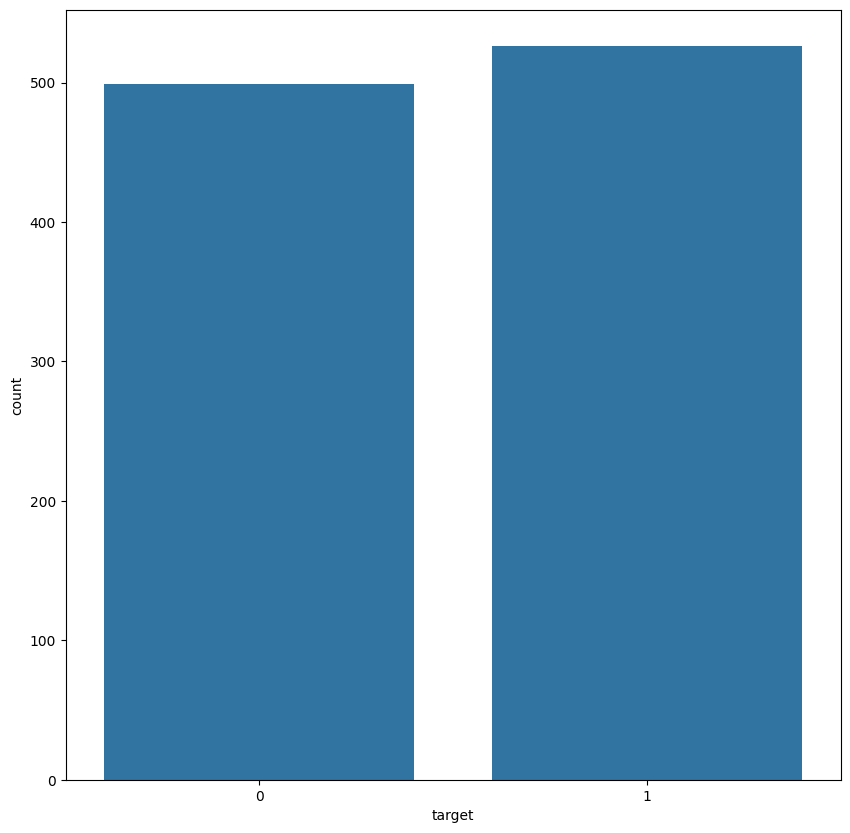

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['target'])
plt.show()

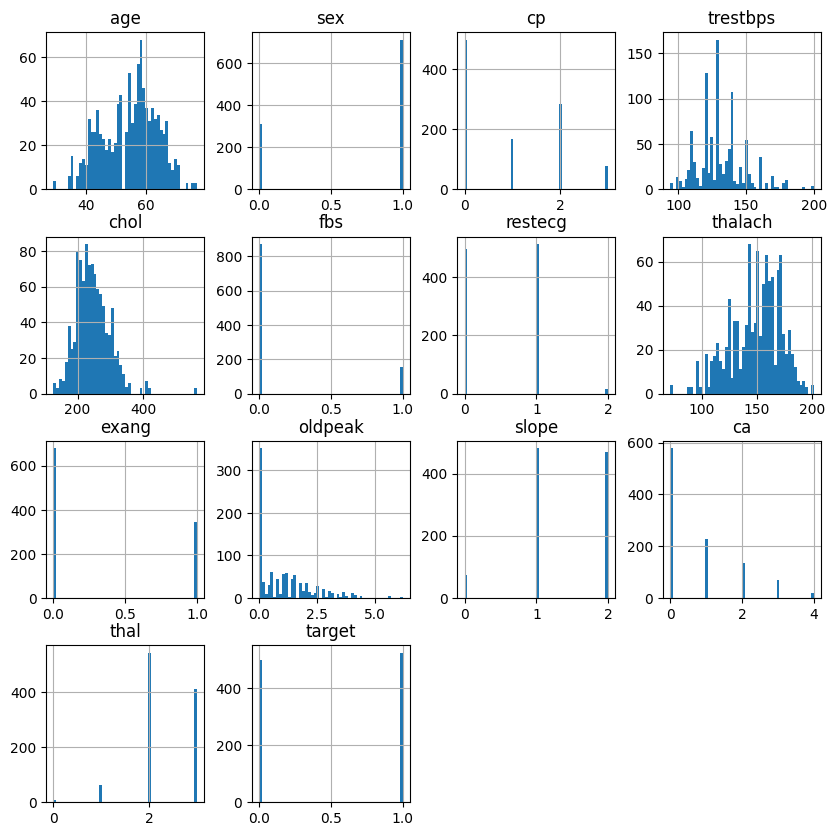

In [47]:
df.hist(bins=50,figsize=(10,10))
plt.show()

In [77]:
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


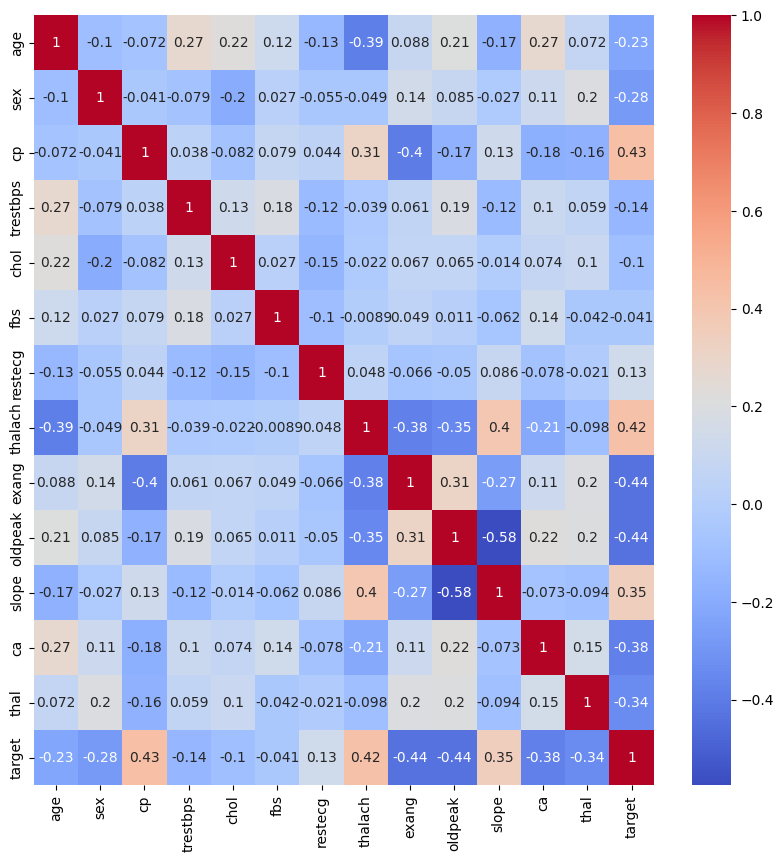

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

##**TRAIN TEST SPLIT**

In [49]:
x = df.drop(columns='target')
y = df['target']

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

##**DATA PREPROCESSING**

In [51]:
features = x.columns

In [52]:
pre = Pipeline([('scaler',StandardScaler())])

In [53]:
preprocessing = ColumnTransformer([('preprocess',pre,features)])

##**BASELINE MODEL LOGISTIC REGRESSION**

In [57]:
model = Pipeline([('preprocessing',preprocessing),
                  ('logistic_regression',LogisticRegression(max_iter=100,random_state=42))])

In [58]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object'))])),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [65]:
prediction = model.predict(x_test)
probability = model.predict_proba(x_test)[:,1]

In [66]:
print('ROC AUC SCORE IS : ',roc_auc_score(y_test,probability))

ROC AUC SCORE IS :  0.9298095238095239


In [67]:
print('Accuracy Score is : ',accuracy_score(y_test,prediction))

Accuracy Score is :  0.8097560975609757


##**ROC CURVE**

In [70]:
fpr,tpr,thresholds = roc_curve(y_test,probability)

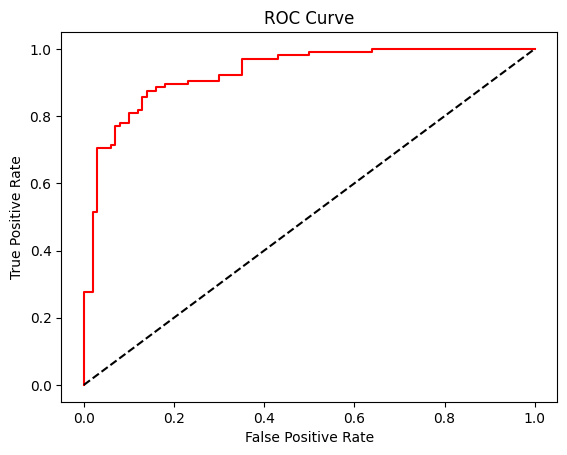

In [72]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],linestyle='--',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()